In [1]:
import numpy as np
import matplotlib.pyplot as plt

Randomizing a frequency:

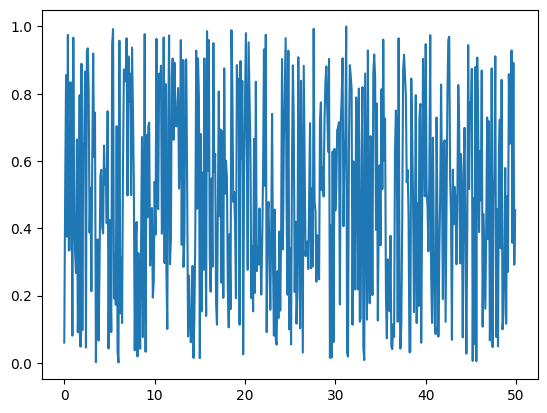

In [2]:
# create a random number generator
rng = np.random.default_rng()

time = np.arange(0, 50, 0.1)

frequency = rng.random(size=time.shape)

plt.plot(time, frequency)
plt.show()

Generating sound with a random frequency for each sample (White Noise):

In [3]:
from IPython.display import Audio

sample_rate = 44100 # Samples per second

duration = 5.0 # Duration in seconds

samples = np.arange(duration * sample_rate)

freq_hz = rng.random(size=samples.shape) # Frequency / pitch of the sine wave

freq_hz *= 0.3 # lower the volume

Audio(freq_hz, rate=sample_rate)

In [4]:
amplitude = np.sin(samples)

We can generate a simple sine wave in numpy like so:

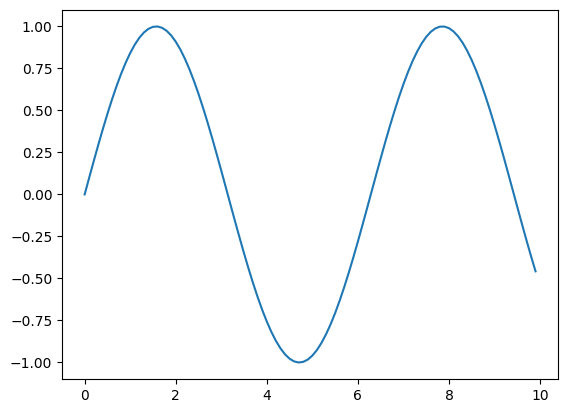

In [5]:
# Get x values of the sine wave
samples = np.arange(0, 10, 0.1) # create an array from 0 to 10 in 0.1 increments

# Amplitude of the sine wave is sine of a variable like samples
amplitude = np.sin(samples)

# Plot a sine wave using samples and amplitude obtained for the sine wave
plt.plot(samples, amplitude)
plt.show()

Adding some noise to the wave:

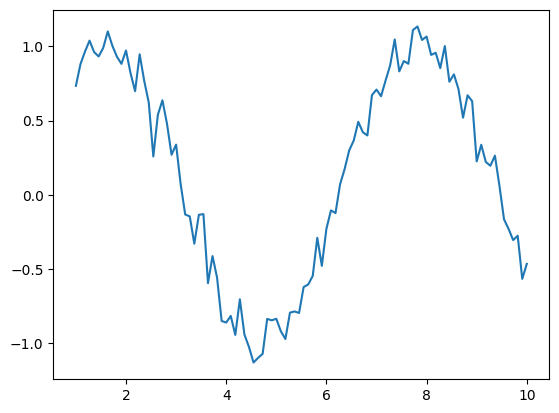

In [6]:
samples = np.linspace(1, 10, num=100) # another way to create an array from 0 to 10 in 0.1 increments

amplitude = np.sin(samples) 

# create a random number generator
rng = np.random.default_rng()

noisy_amplitude = amplitude + rng.normal(scale=0.1, size=amplitude.shape) # Draw random samples from a normal (Gaussian) distribution.

# Plot a sine wave using samples and amplitude obtained for the sine wave
plt.plot(samples, noisy_amplitude)
plt.show()

#### Generate sound

It's possible to use the concept from above to generate sound:

In [22]:
from IPython.display import Audio

sample_rate = 44100 # Samples per second

freq_hz = 400.0 # Frequency / pitch of the sine wave

duration = 5.0 # Duration in seconds

samples = np.arange(duration * sample_rate)

waveform = np.sin(2 * np.pi * samples * freq_hz / sample_rate)

waveform *= 0.3 # lower the volume

# plt.plot(samples/sample_rate, waveform)
# plt.show()

Audio(waveform, rate=sample_rate)

Let's add some noise:

In [8]:
noisy_waveform = waveform + rng.normal(scale=0.1, size=waveform.shape)
Audio(noisy_waveform, rate=sample_rate)

Extra: Modulating a sine wave

In [23]:
sample_rate = 44100

duration = 3.0

f_c = 440.0 # Frequency of the carrier, in hz
f_m = 110.0 # Frequency of the modulator, in hz
k = 3.0 # deviation constant.

samples = np.arange(duration * sample_rate)
carrier = 2 * np.pi * samples * f_c / sample_rate
modulator = k * np.sin(2 * np.pi * samples * f_m / sample_rate)
waveform = np.cos(carrier + modulator)

waveform *= 0.3

Audio(waveform, rate=sample_rate)

### Perlin Noise

In [10]:
!pip install git+https://github.com/pvigier/perlin-numpy

  Cloning https://github.com/pvigier/perlin-numpy to /private/var/folders/vf/5w3tbc_938765d7mm735jtkw0000gn/T/pip-req-build-6iwufhl6
  Running command git clone --filter=blob:none --quiet https://github.com/pvigier/perlin-numpy /private/var/folders/vf/5w3tbc_938765d7mm735jtkw0000gn/T/pip-req-build-6iwufhl6
  Resolved https://github.com/pvigier/perlin-numpy to commit 5e26837db14042e51166eb6cad4c0df2c1907016
  Preparing metadata (setup.py) ... done
  Created wheel for perlin-numpy: filename=perlin_numpy-0.0.0-py3-none-any.whl size=4725 sha256=978add3dadbabe0ec5702c252c444ea2edf27529941d153022ee138d49a1245d
  Stored in directory: /private/var/folders/vf/5w3tbc_938765d7mm735jtkw0000gn/T/pip-ephem-wheel-cache-6evv3zzb/wheels/e1/27/2f/c4a80de6e28009b6fd435bb52156a16937c7939e5dcdbc9850
Successfully built perlin-numpy


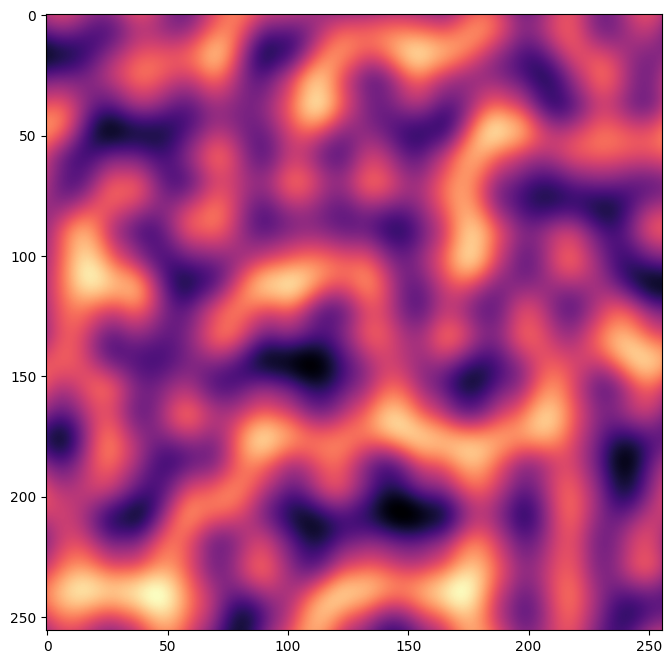

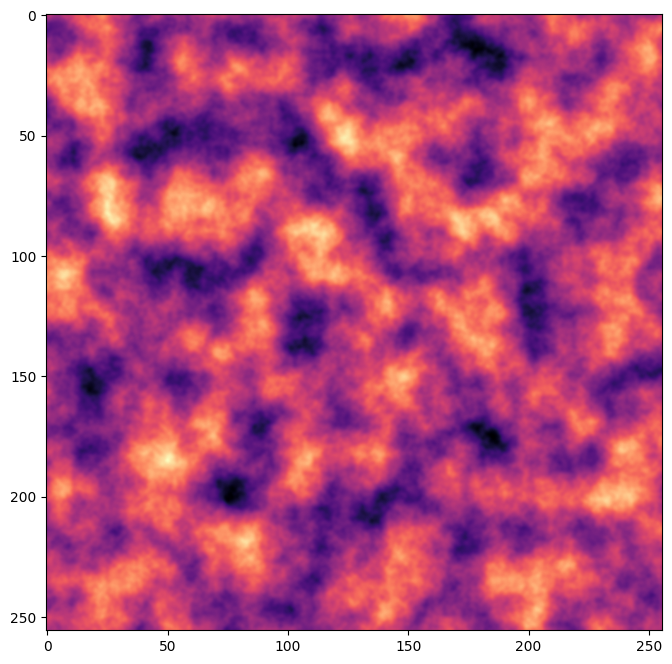

In [11]:
from perlin_numpy import generate_perlin_noise_2d, generate_fractal_noise_2d

np.random.seed(54)
noise = generate_perlin_noise_2d((256, 256), (8, 8))

plt.figure(figsize=(8,8))
plt.imshow(noise, cmap='magma', interpolation='lanczos')

np.random.seed(0)
noise = generate_fractal_noise_2d((256, 256), (8, 8), 5)

plt.figure(figsize=(8,8))
plt.imshow(noise, cmap='magma', interpolation='lanczos')

plt.show()

In [12]:
import matplotlib.animation as animation
from IPython.display import HTML
from perlin_numpy import generate_perlin_noise_3d

np.random.seed(0)
noise = generate_perlin_noise_3d(
    (32, 256, 256), (1, 4, 4), tileable=(True, False, False)
)

fig = plt.figure()
images = [
    [plt.imshow(
        layer, cmap='magma', interpolation='lanczos', animated=True
    )]
    for layer in noise
]

anim = animation.ArtistAnimation(fig, images, interval=50, blit=True)

# plt.show()
plt.close()
HTML(anim.to_html5_video())

In [13]:
from perlin_numpy import generate_fractal_noise_3d

np.random.seed(0)
noise = generate_fractal_noise_3d(
    (32, 256, 256), (1, 4, 4), 4, tileable=(True, False, False)
)

fig = plt.figure()
images = [
    [plt.imshow(
        layer, cmap='magma', interpolation='lanczos', animated=True
    )]
    for layer in noise
]
anim = animation.ArtistAnimation(fig, images, interval=50, blit=True)

# plt.show()
plt.close()
HTML(anim.to_html5_video())

#### Simplex Noise

In [14]:
!pip install opensimplex

  Using cached opensimplex-0.4.3-py3-none-any.whl (19 kB)


OpenSimplex noise is an n-dimensional (up to 4D) gradient noise function that was developed in order to overcome the patent-related issues surrounding simplex noise, while likewise avoiding the visually-significant directional artifacts characteristic of Perlin noise. 

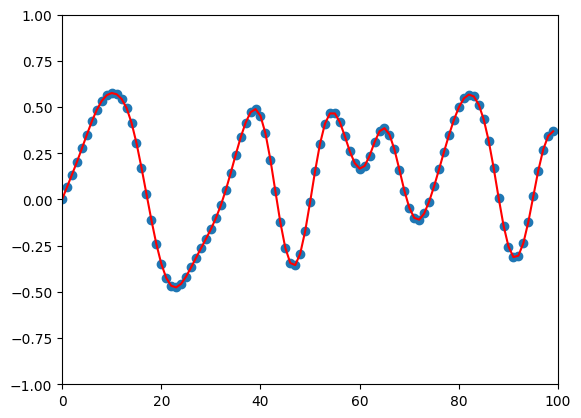

In [15]:
import opensimplex

noise = opensimplex.OpenSimplex(seed=10)
n = 100 # Number of values
x = [i for i in range(n)] # List of numbers from 0 to 99

y = []
for i in np.linspace(0, 10, n): # Create 100 point from 0 to 10
    y.append(noise.noise2(i, 0))

plt.xlim((0, n))
plt.ylim((-1, 1))
plt.scatter(x, y)
plt.plot(x, y, 'r')
plt.show()

The pillow package allows to easily create, transform and save images in python. (PIL = Python Imaging Library)

In [16]:
!pip install Pillow

Generating 2D image...


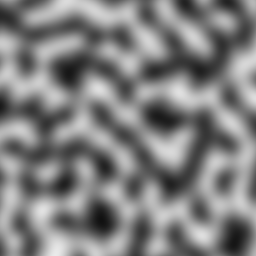

In [17]:
from PIL import Image

width = 256
height = 256
feature_size = 24.0

print('Generating 2D image...')

im = Image.new('L', (width, height))

for y in range(0, height):
    for x in range(0, width):
        value = opensimplex.noise2(x / feature_size, y / feature_size)
        color = int((value + 1) * 128)
        im.putpixel((x, y), color)

from IPython.display import Image   
display(im)

In [18]:
im.save('noise2d.png')

Generating 2D slice of 3D...


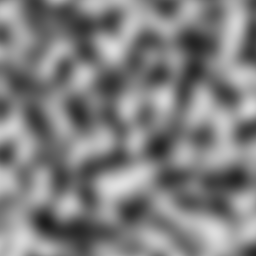

In [19]:
print('Generating 2D slice of 3D...')

for y in range(0, height):
    for x in range(0, width):
        value = opensimplex.noise3(x / feature_size, y / feature_size, 0.0)
        color = int((value + 1) * 128)
        im.putpixel((x, y), color)

display(im)

https://necessarydisorder.wordpress.com/2017/11/15/drawing-from-noise-and-then-making-animated-loopy-gifs-from-there/

#### Extra: Generating colored noise
source: https://github.com/felixpatzelt/colorednoise


In [20]:
from numpy import sqrt, newaxis
from numpy.fft import irfft, rfftfreq
from numpy.random import normal
from numpy import sum as npsum

def powerlaw_psd_gaussian(exponent, size, fmin=0):
    
    """Gaussian (1/f)**beta noise.
    Based on the algorithm in:
    Timmer, J. and Koenig, M.:
    On generating power law noise.
    Astron. Astrophys. 300, 707-710 (1995)
    Normalised to unit variance
    Parameters:
    -----------
    exponent : float
        The power-spectrum of the generated noise is proportional to
        S(f) = (1 / f)**beta
        flicker / pink noise:   exponent beta = 1
        brown noise:            exponent beta = 2
        Furthermore, the autocorrelation decays proportional to lag**-gamma
        with gamma = 1 - beta for 0 < beta < 1.
        There may be finite-size issues for beta close to one.
    shape : int or iterable
        The output has the given shape, and the desired power spectrum in
        the last coordinate. That is, the last dimension is taken as time,
        and all other components are independent.
    fmin : float, optional
        Low-frequency cutoff.
        Default: 0 corresponds to original paper. It is not actually
        zero, but 1/samples.
    Returns
    -------
    out : array
        The samples.
    Examples:
    ---------
    # generate 1/f noise == pink noise == flicker noise
    >>> import colorednoise as cn
    >>> y = cn.powerlaw_psd_gaussian(1, 5)
    """
    
    # Make sure size is a list so we can iterate it and assign to it.
    try:
        size = list(size)
    except TypeError:
        size = [size]
    
    # The number of samples in each time series
    samples = size[-1]
    
    # Calculate Frequencies (we asume a sample rate of one)
    # Use fft functions for real output (-> hermitian spectrum)
    f = rfftfreq(samples)
    
    # Build scaling factors for all frequencies
    s_scale = f
    fmin = max(fmin, 1./samples) # Low frequency cutoff
    ix   = npsum(s_scale < fmin)   # Index of the cutoff
    if ix and ix < len(s_scale):
        s_scale[:ix] = s_scale[ix]
    s_scale = s_scale**(-exponent/2.)
    
    # Calculate theoretical output standard deviation from scaling
    w      = s_scale[1:].copy()
    w[-1] *= (1 + (samples % 2)) / 2. # correct f = +-0.5
    sigma = 2 * sqrt(npsum(w**2)) / samples
    
    # Adjust size to generate one Fourier component per frequency
    size[-1] = len(f)

    # Add empty dimension(s) to broadcast s_scale along last
    # dimension of generated random power + phase (below)
    dims_to_add = len(size) - 1
    s_scale     = s_scale[(newaxis,) * dims_to_add + (Ellipsis,)]
    
    # Generate scaled random power + phase
    sr = normal(scale=s_scale, size=size)
    si = normal(scale=s_scale, size=size)
    
    # If the signal length is even, frequencies +/- 0.5 are equal
    # so the coefficient must be real.
    if not (samples % 2): si[...,-1] = 0
    
    # Regardless of signal length, the DC component must be real
    si[...,0] = 0
    
    # Combine power + corrected phase to Fourier components
    s  = sr + 1J * si
    
    # Transform to real time series & scale to unit variance
    y = irfft(s, n=samples, axis=-1) / sigma
    
    return y


In [21]:
sample_rate = 32000
beta = 2 # the exponent
samples = sample_rate * 60 # number of samples to generate

waveform = powerlaw_psd_gaussian(beta, samples)

Audio(waveform, rate=sample_rate)    